# Análisis de Propiedades en Canberra, Australia 

Con este código logramos dedicarnos al análisis exploratorio de 43,000 propiedades en Australia. Con este análisis exploratorio de datos es posible conocer patrones y tendencias que permiten a Desarrolladores Inmobiliarios a tomar mejores decisiones de inversión.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
state = pd.read_csv("../lalemus/property_sales_canberra.csv")

In [3]:
state.head(10)

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
0,9/06/2000,223000.0,Nicholls,2913,NaN,NaN,2,2.0,4,house,ACT708
1,1/01/2001,350000.0,Ngunnawal,2913,NaN,NaN,1,NaN,3,house,ACT706
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
3,21/09/2005,276000.0,Isabella Plains,2905,NaN,NaN,1,1.0,3,house,ACT612
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613
5,22/11/2005,350000.0,Theodore,2905,NaN,NaN,2,2.0,3,house,ACT610
6,8/12/2005,447500.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613
7,14/12/2005,355000.0,Conder,2906,NaN,NaN,2,NaN,4,house,ACT613
8,22/12/2005,350000.0,Conder,2906,NaN,NaN,1,NaN,4,house,ACT613
9,9/01/2006,435000.0,Banks,2906,NaN,NaN,2,NaN,4,house,ACT614


In [4]:
state.tail(10)

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
43168,19/09/2019,350000.0,Turner,2612,-35.275181,149.128524,1,1.0,1,unit,ACT105
43169,20/09/2019,450000.0,City,2601,-35.284977,149.131022,1,1.0,1,unit,ACT108
43170,20/09/2019,2000000.0,Kingston,2604,-35.310666,149.146433,2,2.0,2,unit,ACT217
43171,20/09/2019,595000.0,Turner,2612,-35.264858,149.129861,2,2.0,2,unit,ACT105
43172,21/09/2019,875000.0,Kingston,2604,-35.314673,149.139108,1,2.0,3,unit,ACT217
43173,21/09/2019,350000.0,Phillip,2606,-35.338702,149.084217,1,1.0,1,unit,ACT338
43174,23/09/2019,250000.0,Scullin,2614,-35.234051,149.042699,1,1.0,2,unit,ACT564
43175,23/09/2019,219000.0,O'Connor,2602,-35.264381,149.123139,1,1.0,1,unit,ACT103
43176,23/09/2019,320000.0,Turner,2612,-35.266120,149.126326,1,1.0,1,unit,ACT105
43177,23/09/2019,400000.0,City,2601,-35.282441,149.125022,1,1.0,1,unit,ACT108


In [5]:
state["suburb"].unique()

array(['Nicholls', 'Ngunnawal', 'Weston', 'Isabella Plains', 'Conder',
       'Theodore', 'Banks', 'Gordon', 'Chisholm', 'Waramanga',
       'Wanniassa', 'Gilmore', 'Gowrie', 'Bonython', 'Pearce', 'Calwell',
       'Mawson', "O'Malley", 'Kambah', 'Yarralumla', 'Deakin', 'Monash',
       'Braddon', 'Reid', 'Fadden', 'Narrabundah', 'Fraser', 'Amaroo',
       'Red Hill', 'Hackett', 'Belconnen', 'Florey', 'Barton', 'Downer',
       'Garran', 'City', 'Oxley', 'Griffith', 'Curtin', "O'Connor",
       'Ainslie', 'Scullin', 'Chapman', 'Lyons', 'Isaacs', 'Farrer',
       'Richardson', 'Hughes', 'Kaleen', 'Fisher', 'Torrens', 'Forrest',
       'Duffy', 'Stirling', 'McKellar', 'Turner', 'Macquarie', 'Evatt',
       'Spence', 'Dickson', 'Aranda', 'Holt', 'Dunlop', 'Watson',
       'Gungahlin', 'Bruce', 'Palmerston', 'Latham', 'Chifley', 'Phillip',
       'Melba', 'Harrison', 'Campbell', 'Hawker', 'Giralang', 'Rivett',
       'Macarthur', 'Flynn', 'Lyneham', 'MacGregor', 'Cook', 'Higgins',
       '

In [6]:
state.shape

(43178, 11)

In [7]:
state.columns.values

array(['datesold', 'price', 'suburb', 'postcode', 'lat', 'lon', 'parking',
       'bathrooms', 'bedrooms', 'propertyType', 'suburbid'], dtype=object)

In [8]:
state.describe()

,price,postcode,lat,lon,parking,bathrooms,bedrooms
count,4.243500e+04,43178.000000,42033.000000,42033.000000,43178.000000,42499.000000,43178.000000
mean,6.037398e+05,2728.855644,-35.293447,149.096122,1.760017,1.643403,3.193501
std,3.139764e+05,146.564444,0.091796,0.040526,0.937361,0.644463,0.990638
min,5.000000e+04,2092.000000,-35.509975,148.921424,0.000000,1.000000,0.000000
25%,4.300000e+05,2607.000000,-35.363857,149.067390,1.000000,1.000000,3.000000
50%,5.390000e+05,2615.000000,-35.270536,149.099522,2.000000,2.000000,3.000000
75%,6.760000e+05,2905.000000,-35.212323,149.130708,2.000000,2.000000,4.000000
max,8.000000e+06,2914.000000,-35.138572,149.250290,31.000000,21.000000,14.000000


In [9]:
state.dtypes

datesold         object
price           float64
suburb           object
postcode          int64
lat             float64
lon             float64
parking           int64
bathrooms       float64
bedrooms          int64
propertyType     object
suburbid         object
dtype: object

In [10]:
state1 = state[["parking", "bathrooms", "bedrooms", "propertyType", "price"]]

In [11]:
state1.head(5)

,parking,bathrooms,bedrooms,propertyType,price
0,2,2.0,4,house,223000.0
1,1,NaN,3,house,350000.0
2,2,NaN,4,house,550000.0
3,1,1.0,3,house,276000.0
4,2,NaN,5,house,400000.0


In [12]:
state1.shape

(43178, 5)

In [13]:
type(state1)

pandas.core.frame.DataFrame

In [14]:
state1["propertyType"].unique()

array(['house', 'unit'], dtype=object)

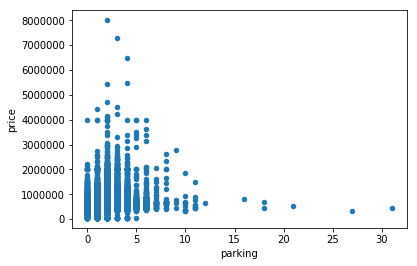

In [15]:
state.plot(kind = "scatter", x = "parking", y = "price")
plt.savefig('parking-price.png')
plt.show()

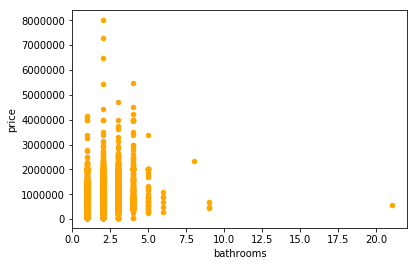

In [16]:
state.plot(kind = "scatter", x = "bathrooms", y = "price", color = "orange")
plt.savefig('bathrooms-price.png')
plt.show()

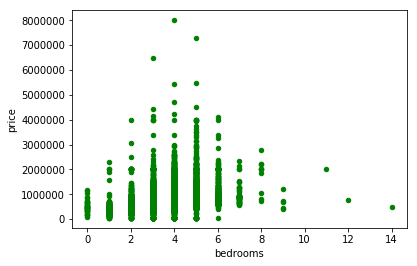

In [17]:
state.plot(kind = "scatter", x = "bedrooms", y = "price", color = "green")
plt.savefig('bedrooms-price.png')
plt.show()

In [18]:
print(pd.isnull(state1["parking"]).values.ravel().sum())
print(pd.isnull(state1["bathrooms"]).values.ravel().sum())
print(pd.isnull(state1["bedrooms"]).values.ravel().sum())
print(pd.isnull(state1["propertyType"]).values.ravel().sum())
print(pd.isnull(state1["price"]).values.ravel().sum())

0
679
0
0
743


In [19]:
state1 = state1.fillna(method='ffill')

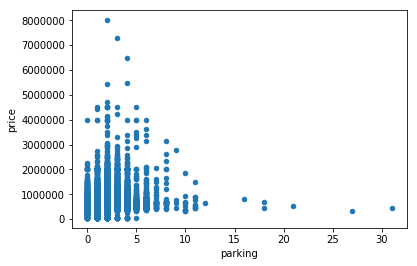

In [20]:
state1.plot(kind = "scatter", x = "parking", y = "price")

In [21]:
state[state["price"] > 5000000]

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
3975,22/04/2010,7300000.0,Red Hill,2603,-35.336722,149.129959,3,2.0,5,house,ACT221
7010,7/09/2011,5425000.0,Gungahlin,2912,-35.185842,149.132314,2,2.0,4,house,ACT710
19367,2/11/2015,8000000.0,Wright,2611,-35.320184,149.034271,2,2.0,4,house,ACT907
23941,19/11/2016,6480000.0,Holder,2611,-35.339303,149.040707,4,2.0,3,house,ACT447
23942,20/11/2016,5475000.0,Yarralumla,2600,-35.308211,149.099959,4,4.0,5,house,ACT212


In [22]:
state[state["parking"] > 15]

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
4009,30/04/2010,460000.0,Calwell,2905,-35.441325,149.116409,18,9.0,9,house,ACT611
11315,15/07/2013,449500.0,Scullin,2614,-35.232948,149.037147,31,1.0,3,house,ACT564
12280,15/11/2013,328200.0,Phillip,2606,-35.346442,149.095110,27,1.0,2,house,ACT338
13428,27/03/2014,676000.0,Forde,2914,-35.179332,149.143566,18,2.0,9,house,ACT716
32186,31/08/2018,798000.0,Chisholm,2905,-35.205947,149.002032,16,2.0,4,house,ACT609
41463,3/04/2018,530000.0,Griffith,2603,-35.321434,149.145622,21,2.0,2,unit,ACT220


# Red Hill

In [23]:
redhill = state[state["suburb"] == "Red Hill"]
redhill.shape

(321, 11)

In [24]:
redhill.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
73,4/07/2007,675000.0,Red Hill,2603,NaN,NaN,2,NaN,4,house,ACT221
171,21/09/2007,1460000.0,Red Hill,2603,-35.341599,149.132965,2,NaN,5,house,ACT221
314,16/02/2008,675000.0,Red Hill,2603,-35.339886,149.130554,1,3.0,3,house,ACT221
343,16/03/2008,50000.0,Red Hill,2603,-35.333557,149.129471,2,4.0,4,house,ACT221
417,2/06/2008,1180000.0,Red Hill,2603,-35.335655,149.130112,2,1.0,4,house,ACT221


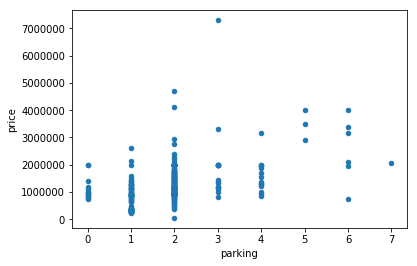

In [25]:
redhill.plot(kind = "scatter", x = "parking", y = "price")
plt.savefig('redhill-parking-price.png')
plt.show()

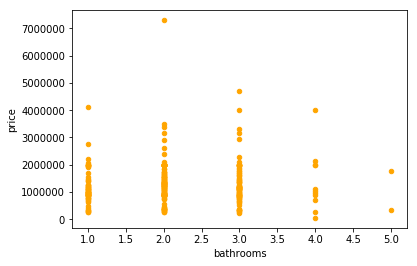

In [26]:
redhill.plot(kind = "scatter", x = "bathrooms", y = "price", color = "orange")
plt.savefig('redhill-bathrooms-price.png')
plt.show()

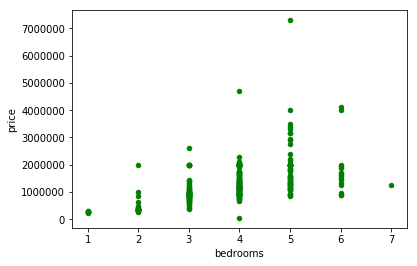

In [27]:
redhill.plot(kind = "scatter", x = "bedrooms", y = "price", color = "green")
plt.savefig('redhill-bedrooms-price.png')
plt.show()

In [28]:
redhill = redhill.dropna(axis = 0, how = "any")

In [29]:
redhill.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
314,16/02/2008,675000.0,Red Hill,2603,-35.339886,149.130554,1,3.0,3,house,ACT221
343,16/03/2008,50000.0,Red Hill,2603,-35.333557,149.129471,2,4.0,4,house,ACT221
417,2/06/2008,1180000.0,Red Hill,2603,-35.335655,149.130112,2,1.0,4,house,ACT221
582,2/09/2008,955000.0,Red Hill,2603,-35.335575,149.125961,2,2.0,6,house,ACT221
698,2/10/2008,875000.0,Red Hill,2603,-35.339924,149.124313,2,1.0,6,house,ACT221


In [30]:
from sklearn import linear_model

In [31]:
X_multiple = redhill.iloc[:,6:9]
X_multiple.shape

(309, 3)

In [32]:
Y_multiple = redhill.iloc[:,1:2]
Y_multiple.shape

(309, 1)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_multiple, Y_multiple, test_size = 0.2)

In [35]:
lr_multiple = linear_model.LinearRegression()

In [36]:
lr_multiple.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
Y_pred_multiple = lr_multiple.predict(X_test)

In [38]:
lr_multiple.coef_

array([[231766.15396378,  30331.46306627, 290170.72613026]])

In [39]:
lr_multiple.intercept_

array([-285583.60661703])

In [40]:
lr_multiple.score(X_train, y_train)

0.3636477889165408

# Holt

In [41]:
holt = state[state["suburb"] == "Holt"]
holt.shape

(670, 11)

In [42]:
holt = holt.dropna(axis = 0, how = "any")
holt.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
584,3/09/2008,372000.0,Holt,2615,-35.229965,149.013870,2,2.0,3,house,ACT568
587,4/09/2008,350000.0,Holt,2615,-35.220753,149.002396,0,2.0,3,house,ACT568
601,8/09/2008,349000.0,Holt,2615,-35.221043,149.002289,2,1.0,3,house,ACT568
604,10/09/2008,371600.0,Holt,2614,-35.223606,149.002319,2,2.0,4,house,ACT568
607,12/09/2008,350000.0,Holt,2615,-35.220402,149.019196,2,1.0,3,house,ACT568


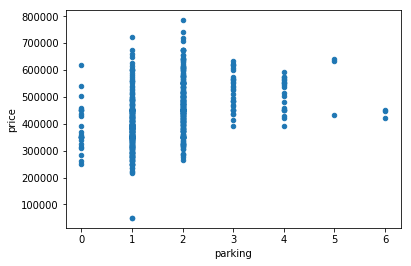

In [43]:
holt.plot(kind = "scatter", x = "parking", y = "price")
plt.savefig('holt-parking-price.png')
plt.show()

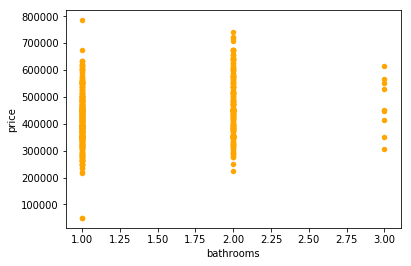

In [44]:
holt.plot(kind = "scatter", x = "bathrooms", y = "price", color = "orange")
plt.savefig('holt-bathrooms-price.png')
plt.show()

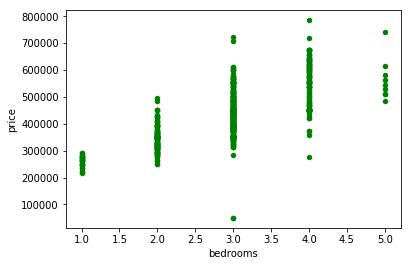

In [45]:
holt.plot(kind = "scatter", x = "bedrooms", y = "price", color = "green")
plt.savefig('holt-bedrooms-price.png')
plt.show()

# Precios por Sector

In [46]:
state["suburb"].unique()

array(['Nicholls', 'Ngunnawal', 'Weston', 'Isabella Plains', 'Conder',
       'Theodore', 'Banks', 'Gordon', 'Chisholm', 'Waramanga',
       'Wanniassa', 'Gilmore', 'Gowrie', 'Bonython', 'Pearce', 'Calwell',
       'Mawson', "O'Malley", 'Kambah', 'Yarralumla', 'Deakin', 'Monash',
       'Braddon', 'Reid', 'Fadden', 'Narrabundah', 'Fraser', 'Amaroo',
       'Red Hill', 'Hackett', 'Belconnen', 'Florey', 'Barton', 'Downer',
       'Garran', 'City', 'Oxley', 'Griffith', 'Curtin', "O'Connor",
       'Ainslie', 'Scullin', 'Chapman', 'Lyons', 'Isaacs', 'Farrer',
       'Richardson', 'Hughes', 'Kaleen', 'Fisher', 'Torrens', 'Forrest',
       'Duffy', 'Stirling', 'McKellar', 'Turner', 'Macquarie', 'Evatt',
       'Spence', 'Dickson', 'Aranda', 'Holt', 'Dunlop', 'Watson',
       'Gungahlin', 'Bruce', 'Palmerston', 'Latham', 'Chifley', 'Phillip',
       'Melba', 'Harrison', 'Campbell', 'Hawker', 'Giralang', 'Rivett',
       'Macarthur', 'Flynn', 'Lyneham', 'MacGregor', 'Cook', 'Higgins',
       '

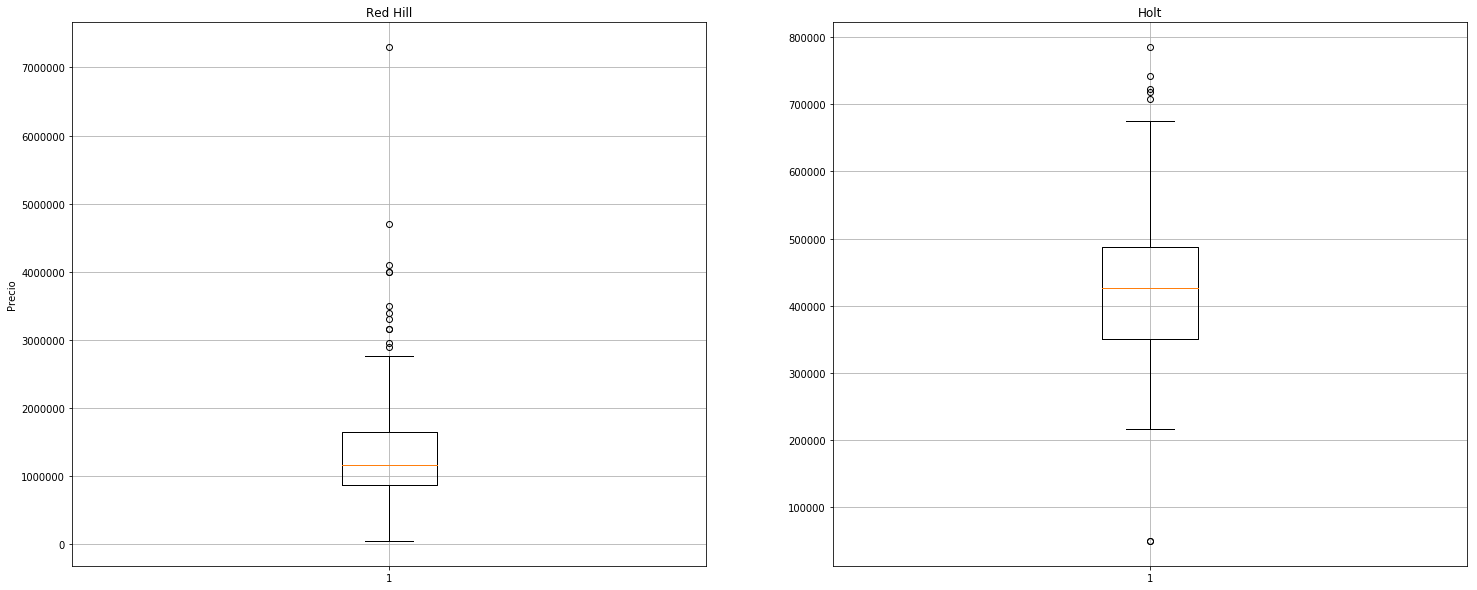

In [47]:
plt.figure(figsize = (25,10))

plt.subplot(121)
plt.boxplot(redhill["price"])
plt.ylabel("Precio")
plt.title("Red Hill")
plt.grid(True)

plt.subplot(122)
plt.boxplot(holt["price"])
plt.title("Holt")
plt.grid(True)

In [48]:
estredhill = redhill["price"].describe()
estholt = holt["price"].describe()

In [49]:
estredhill

count    3.090000e+02
mean     1.307818e+06
std      7.657998e+05
min      5.000000e+04
25%      8.750000e+05
50%      1.163000e+06
75%      1.649000e+06
max      7.300000e+06
Name: price, dtype: float64

In [50]:
estredhill[1]

1307817.928802589

In [51]:
estredhill[2] / estredhill[1]

0.5855553935077641

In [52]:
state["suburb"].unique()

array(['Nicholls', 'Ngunnawal', 'Weston', 'Isabella Plains', 'Conder',
       'Theodore', 'Banks', 'Gordon', 'Chisholm', 'Waramanga',
       'Wanniassa', 'Gilmore', 'Gowrie', 'Bonython', 'Pearce', 'Calwell',
       'Mawson', "O'Malley", 'Kambah', 'Yarralumla', 'Deakin', 'Monash',
       'Braddon', 'Reid', 'Fadden', 'Narrabundah', 'Fraser', 'Amaroo',
       'Red Hill', 'Hackett', 'Belconnen', 'Florey', 'Barton', 'Downer',
       'Garran', 'City', 'Oxley', 'Griffith', 'Curtin', "O'Connor",
       'Ainslie', 'Scullin', 'Chapman', 'Lyons', 'Isaacs', 'Farrer',
       'Richardson', 'Hughes', 'Kaleen', 'Fisher', 'Torrens', 'Forrest',
       'Duffy', 'Stirling', 'McKellar', 'Turner', 'Macquarie', 'Evatt',
       'Spence', 'Dickson', 'Aranda', 'Holt', 'Dunlop', 'Watson',
       'Gungahlin', 'Bruce', 'Palmerston', 'Latham', 'Chifley', 'Phillip',
       'Melba', 'Harrison', 'Campbell', 'Hawker', 'Giralang', 'Rivett',
       'Macarthur', 'Flynn', 'Lyneham', 'MacGregor', 'Cook', 'Higgins',
       '

# New Data Set

In [53]:
state10 = state[(state["suburb"] == "Weston") | (state["suburb"] == "Conder") | (state["suburb"] == "Gordon")
                | (state["suburb"] == "Waramanga")]
state10.shape

(2327, 11)

# Visualización


In [54]:
state10["suburb"].unique()

array(['Weston', 'Conder', 'Gordon', 'Waramanga'], dtype=object)

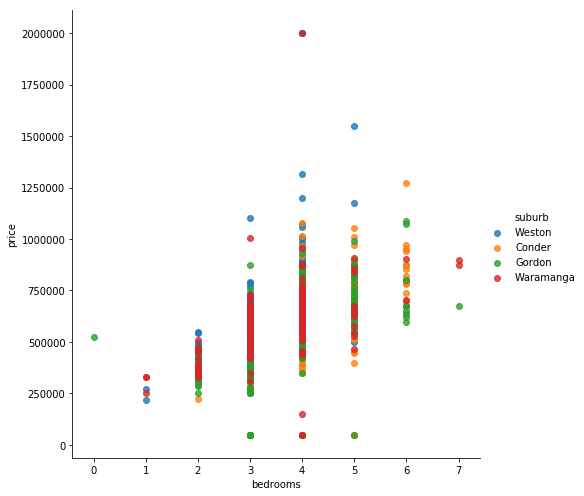

In [55]:
vis1 = sns.lmplot(data = state10, x = "bedrooms", y = "price", fit_reg = False, hue = "suburb", height = 7, aspect = 1)
plt.savefig('4s-bedrooms-price.png')
plt.show()

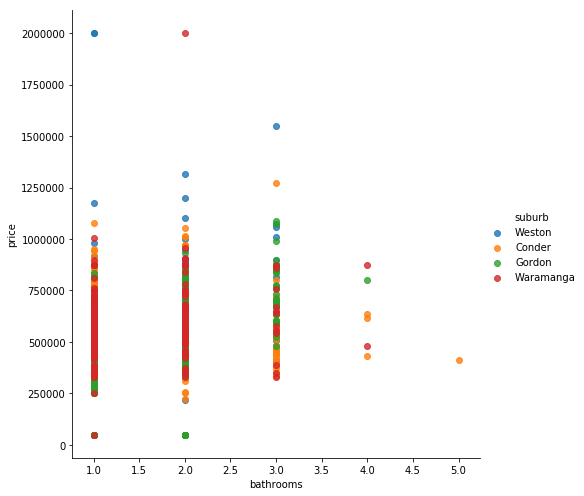

In [56]:
vis1a = sns.lmplot(data = state10, x = "bathrooms", y = "price", fit_reg = False, hue = "suburb", height = 7, aspect = 1)
plt.savefig('4s-bathrooms-price.png')
plt.show()

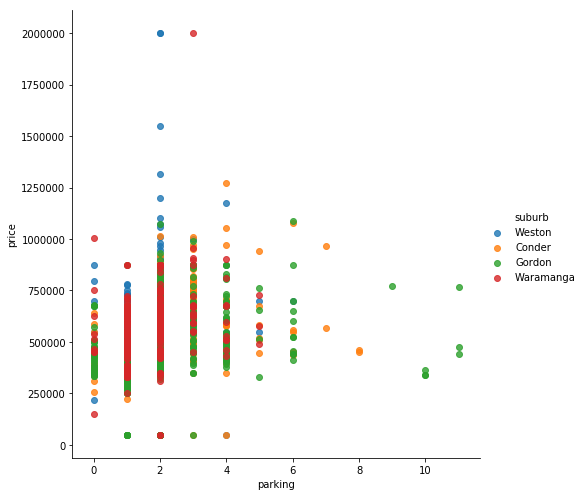

In [57]:
vis1b = sns.lmplot(data = state10, x = "parking", y = "price", fit_reg = False, hue = "suburb", height = 7, aspect = 1)
plt.savefig('4s-parking-price.png')
plt.show()

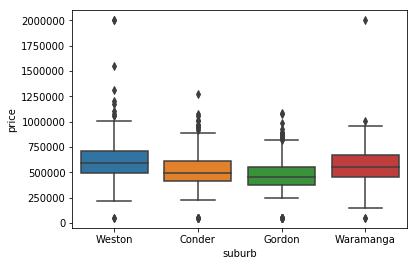

In [58]:
vis2 = sns.boxplot(data = state10, x = "suburb", y = "price")
plt.savefig('4sboxplot-price.png')
plt.show()

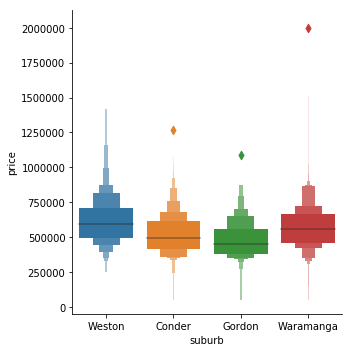

In [59]:
vis3 = sns.catplot(data = state10, x = "suburb", y = "price", kind = "boxen")
plt.savefig('4sbp-price.png')
plt.show()

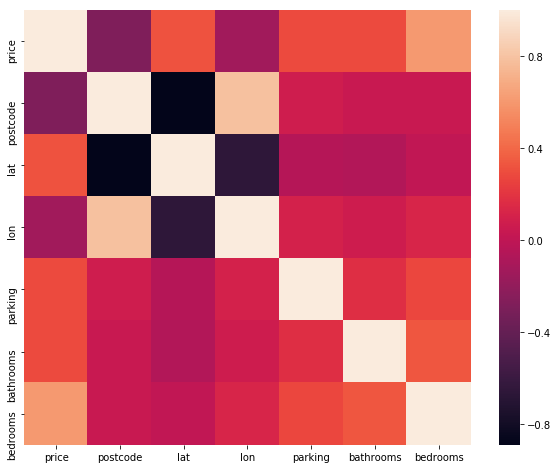

In [60]:
f, ax = plt.subplots(figsize=(10, 8))
corr = state10.corr()
sns.heatmap(corr)
plt.savefig('corr4s.png')
plt.show()

# Predicción de precio para Weston, Conder, Gordon y Waramanga PI

Aquí estamos realizando un modelo de regresión lineal para predecir el precio de las propiedades de Weston, Conder, Gordon y Waramanga. Se están utilizando como variables predictoras la cantidad de parqueos, baños y dormitorios. En esta tabla no existe ningún tipo de transformación de variables.

In [61]:
state10.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
2,11/12/2003,550000.0,Weston,2611,NaN,NaN,2,NaN,4,house,ACT441
4,1/11/2005,400000.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613
6,8/12/2005,447500.0,Conder,2906,NaN,NaN,2,NaN,5,house,ACT613
7,14/12/2005,355000.0,Conder,2906,NaN,NaN,2,NaN,4,house,ACT613
8,22/12/2005,350000.0,Conder,2906,NaN,NaN,1,NaN,4,house,ACT613


In [62]:
state10 = state10.dropna(axis = 0, how = "any")

In [63]:
state10.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
37,1/12/2006,350000.0,Gordon,2906,-35.463834,149.085331,1,2.0,3,house,ACT616
42,21/01/2007,450000.0,Conder,2906,-35.465751,149.111360,2,2.0,3,house,ACT613
45,22/02/2007,350000.0,Gordon,2906,-35.464457,149.084241,1,2.0,3,house,ACT616
46,27/02/2007,290000.0,Conder,2906,-35.462270,149.109476,1,1.0,3,house,ACT613
72,3/07/2007,336000.0,Gordon,2906,-35.455080,149.090221,0,1.0,3,house,ACT616


In [64]:
X_multiple_state10 = state10.iloc[:,6:9]
X_multiple_state10.shape

(2242, 3)

In [65]:
Y_multiple_state10 = state10.iloc[:,1:2]
Y_multiple_state10.shape

(2242, 1)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_trains10, X_tests10, y_trains10, y_tests10 = train_test_split(X_multiple_state10, Y_multiple_state10, test_size = 0.2)

In [68]:
lr_multiples10 = linear_model.LinearRegression()

In [69]:
lr_multiples10.fit(X_trains10, y_trains10)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
Y_pred_multiples10 = lr_multiples10.predict(X_test)

In [71]:
lr_multiples10.coef_

array([[ 24349.35942861,  15352.67226001, 125261.99625887]])

In [72]:
lr_multiples10.intercept_

array([25381.1079716])

In [73]:
lr_multiples10.score(X_trains10, y_trains10)

0.41614542462038856

# Predicción de precio para Weston, Conder, Gordon y Waramanga PII

Aquí estamos realizando un modelo de regresión lineal para predecir el precio de las propiedades de Weston, Conder, Gordon y Waramanga. Se están utilizando como variables predictoras la cantidad de parqueos, baños y dormitorios. En esta tabla estamos quitando los outliers de los precios para ver si la certeza del modelo mejora.

In [74]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize = (16,4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins = 30)
    plt.title("Histograma")
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel("Cuantiles de la variable")
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title("Gráfico de caja")
    
    plt.show()

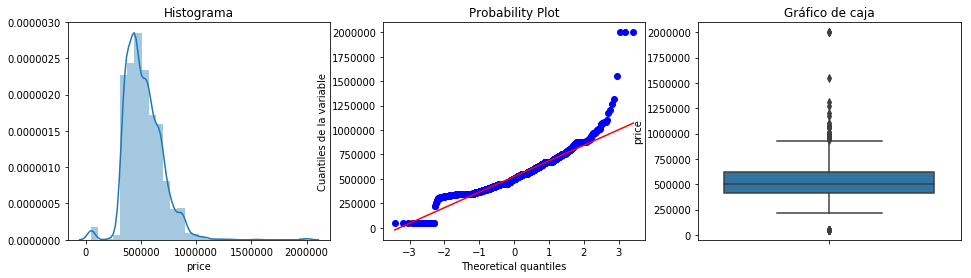

In [75]:
diagnostic_plots(state10, "price")

In [76]:
def find_skewed_boundaries(df, variable, distance):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    return upper_boundary, lower_boundary

In [77]:
p_upper_limit, p_lower_limit = find_skewed_boundaries(state10, "price", 1.5)
p_upper_limit, p_lower_limit

(935000.0, 95000.0)

In [78]:
outliers_p = np.where(state10["price"] > p_upper_limit, True,
                     np.where(state10["price"] < p_lower_limit, True, False))

In [79]:
state10_final = state10.loc[~(outliers_p)]
state10.shape, state10_final.shape

((2242, 11), (2187, 11))

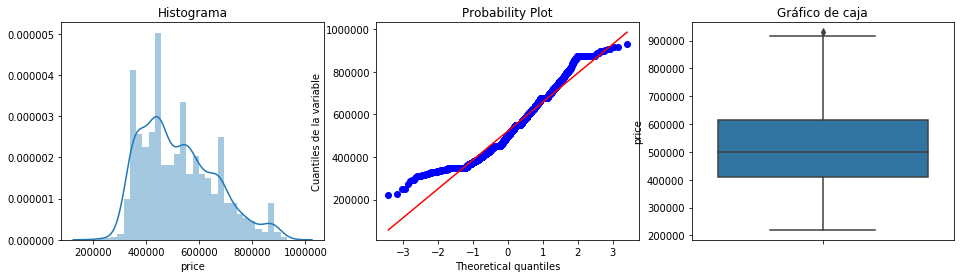

In [80]:
diagnostic_plots(state10_final, "price")

Aquí vamos a empezar a quitar los outliers de la variable parking

In [81]:
state10_final.head(3)

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
37,1/12/2006,350000.0,Gordon,2906,-35.463834,149.085331,1,2.0,3,house,ACT616
42,21/01/2007,450000.0,Conder,2906,-35.465751,149.111360,2,2.0,3,house,ACT613
45,22/02/2007,350000.0,Gordon,2906,-35.464457,149.084241,1,2.0,3,house,ACT616


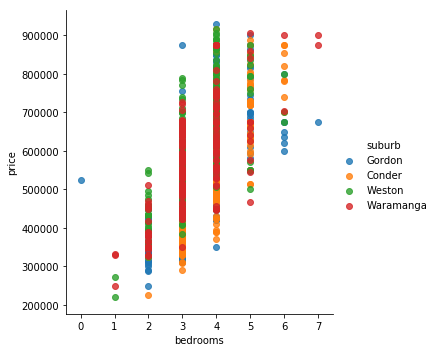

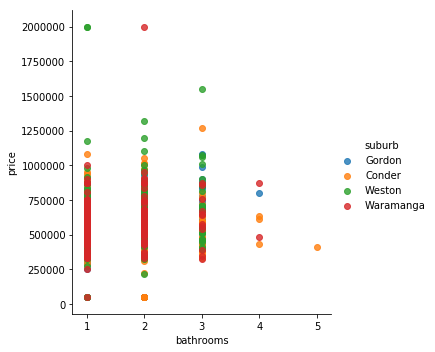

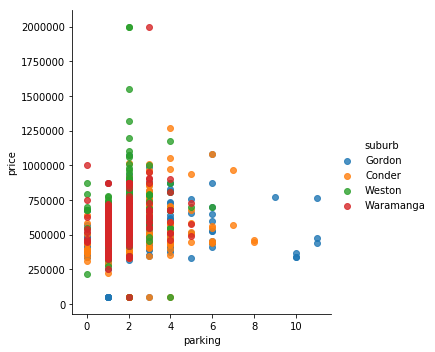

In [82]:
sns.lmplot(data = state10_final, x = "bedrooms", y = "price", fit_reg = False, hue = "suburb", height = 5, aspect = 1)
sns.lmplot(data = state10, x = "bathrooms", y = "price", fit_reg = False, hue = "suburb", height = 5, aspect = 1)
sns.lmplot(data = state10, x = "parking", y = "price", fit_reg = False, hue = "suburb", height = 5, aspect = 1)

In [83]:
X_multiple_state10_final = state10_final.iloc[:,6:9]
X_multiple_state10_final.shape

(2187, 3)

In [84]:
Y_multiple_state10_final = state10_final.iloc[:,1:2]
Y_multiple_state10_final.shape

(2187, 1)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train_can, X_test_can, y_train_can, y_test_can = train_test_split(X_multiple_state10_final, Y_multiple_state10_final,
                                                                    test_size = 0.2)

In [87]:
lr_multiple_can = linear_model.LinearRegression()

In [88]:
lr_multiple_can.fit(X_train_can, y_train_can)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
Y_pred_multiple_can = lr_multiple_can.predict(X_test_can)

In [90]:
lr_multiple_can.coef_

array([[ 14549.43970963,  23942.56725327, 121117.91100796]])

In [91]:
lr_multiple_can.intercept_

array([45282.33186314])

In [92]:
lr_multiple_can.score(X_train_can, y_train_can)

0.4981273341929021

# Agrupación de Suburbios

In [93]:
data_grupo = state.groupby(["suburb"])

In [94]:
data_grupo = state.groupby(["suburb"]).mean()

In [95]:
data_grupo.shape

(107, 7)

In [96]:
data_grupo1 = pd.DataFrame(data_grupo)

In [97]:
by_price = data_grupo1.sort_values('price',ascending=False)
by_price.head()

,price,postcode,lat,lon,parking,bathrooms,bedrooms
suburb,,,,,,,
O'Malley,1.540263e+06,2606.000000,-35.351161,149.096044,2.928571,1.795181,4.738095
Red Hill,1.306272e+06,2603.028037,-35.337887,149.129003,1.950156,2.144201,3.834891
Yarralumla,1.296511e+06,2600.000000,-35.306832,149.102276,1.750000,1.956522,3.402174
Forrest,1.274568e+06,2603.000000,-35.315609,149.128201,1.871111,2.093333,2.888889
Deakin,1.087369e+06,2600.000000,-35.315557,149.106032,1.737265,1.821622,3.353887


In [98]:
by_price.shape

(107, 7)

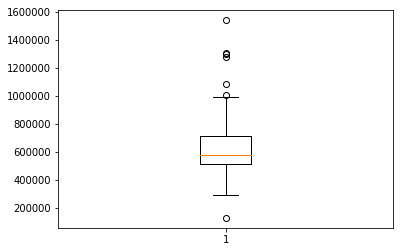

In [99]:
plt.boxplot(by_price["price"])
plt.show()

In [100]:
by_price.describe()

,price,postcode,lat,lon,parking,bathrooms,bedrooms
count,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,6.387394e+05,2701.958540,-35.294948,149.093476,1.793485,1.666213,3.233191
std,2.092474e+05,138.499086,0.084751,0.043053,0.279853,0.235547,0.555136
min,1.292353e+05,2600.000000,-35.508928,148.924385,1.000000,1.058824,1.639566
25%,5.160856e+05,2607.000000,-35.351908,149.063488,1.581951,1.504186,3.012352
50%,5.805602e+05,2614.996689,-35.288208,149.096044,1.826606,1.642857,3.359036
75%,7.115527e+05,2904.000000,-35.222158,149.127738,1.950078,1.829101,3.567189
max,1.540263e+06,2914.000000,-35.161921,149.228726,2.928571,2.214286,4.738095


### Podemos ver que Canberra está conformada por 107 suburbios. El precio promedio de las propiedades en toda la región es de 638,739 dólares. Todas las propiedades oscilan entre 129,235 dólares y 1,540,263 dólares. A continuación podremos ver cómo se distribuyen los precios de las propiedades en toda la región.

# ¿Qué suburbios tienen los precios más altos?

In [101]:
by_price.iloc[0:10,:]

,price,postcode,lat,lon,parking,bathrooms,bedrooms
suburb,,,,,,,
O'Malley,1.540263e+06,2606.000000,-35.351161,149.096044,2.928571,1.795181,4.738095
Red Hill,1.306272e+06,2603.028037,-35.337887,149.129003,1.950156,2.144201,3.834891
Yarralumla,1.296511e+06,2600.000000,-35.306832,149.102276,1.750000,1.956522,3.402174
Forrest,1.274568e+06,2603.000000,-35.315609,149.128201,1.871111,2.093333,2.888889
Deakin,1.087369e+06,2600.000000,-35.315557,149.106032,1.737265,1.821622,3.353887
Campbell,1.007656e+06,2612.000000,-35.288208,149.151961,1.546075,1.777397,3.232082
Hall,9.895714e+05,2618.000000,-35.177030,149.074965,2.600000,1.933333,3.733333
Acton,9.608659e+05,2601.000000,-35.283087,149.124911,1.560976,1.731707,1.878049
Denman Prospect,9.158129e+05,2611.000000,-35.288971,149.042305,1.952381,1.750000,3.714286


In [102]:
by_price = pd.DataFrame(by_price, columns = ["price","postcode","lat","lon","parking","bathrooms","bedrooms","suburb"])
by_price["suburb"] = by_price.index
by_price.head(10)

,price,postcode,lat,lon,parking,bathrooms,bedrooms,suburb
suburb,,,,,,,,
O'Malley,1.540263e+06,2606.000000,-35.351161,149.096044,2.928571,1.795181,4.738095,O'Malley
Red Hill,1.306272e+06,2603.028037,-35.337887,149.129003,1.950156,2.144201,3.834891,Red Hill
Yarralumla,1.296511e+06,2600.000000,-35.306832,149.102276,1.750000,1.956522,3.402174,Yarralumla
Forrest,1.274568e+06,2603.000000,-35.315609,149.128201,1.871111,2.093333,2.888889,Forrest
Deakin,1.087369e+06,2600.000000,-35.315557,149.106032,1.737265,1.821622,3.353887,Deakin
Campbell,1.007656e+06,2612.000000,-35.288208,149.151961,1.546075,1.777397,3.232082,Campbell
Hall,9.895714e+05,2618.000000,-35.177030,149.074965,2.600000,1.933333,3.733333,Hall
Acton,9.608659e+05,2601.000000,-35.283087,149.124911,1.560976,1.731707,1.878049,Acton
Denman Prospect,9.158129e+05,2611.000000,-35.288971,149.042305,1.952381,1.750000,3.714286,Denman Prospect


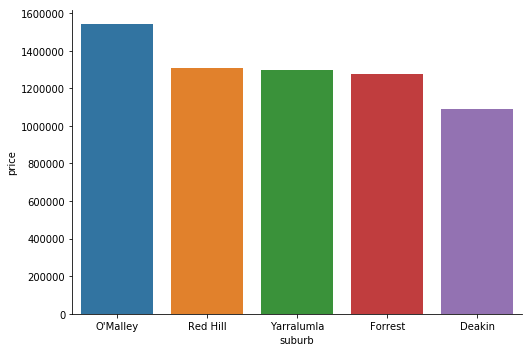

In [103]:
sns.catplot("suburb", "price", data=by_price.head(5), kind="bar", height = 5, aspect = 1.5)
plt.savefig('head.png')
plt.show()

### Los 5 suburbios con propiedades de mayor precio en Canberra son O Malley, Red Hill, Yarralumia, Forrest y Deakin. El precio de estas propiedades oscilan entre 1,087,369 dólares y 1,540,263 dólares. 

In [104]:
by_price.tail(5)

,price,postcode,lat,lon,parking,bathrooms,bedrooms,suburb
suburb,,,,,,,,
Charnwood,406893.135501,2615.000000,-35.199489,149.035756,1.895161,1.205405,3.102151,Charnwood
Phillip,401759.469136,2606.000000,-35.347261,149.093215,1.306763,1.233577,1.908213,Phillip
Belconnen,389474.698370,2616.953395,-35.240482,149.067885,1.356858,1.402945,2.034621,Belconnen
Oaks Estate,292648.531250,2620.000000,-35.339761,149.228726,1.696970,1.272727,2.060606,Oaks Estate
Symonston,129235.294118,2609.000000,-35.345086,149.156428,1.000000,1.058824,1.941176,Symonston


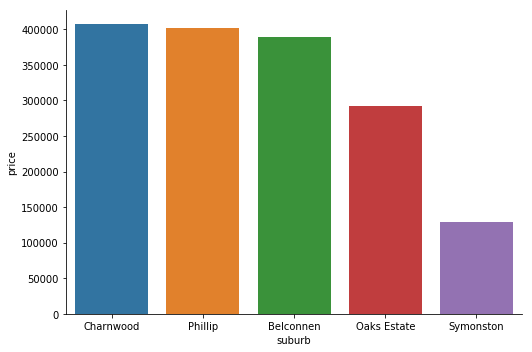

In [105]:
sns.catplot("suburb", "price", data=by_price.tail(5), kind="bar", height = 5, aspect = 1.5)
plt.savefig('tail.png')
plt.show()

### Los 5 suburbios con propiedades de menor precio en Canberra son Charnwood, Phillip, Belconnen, Oaks Estate y Symonston. El precio de estas propiedades oscilan entre 129,235 dólares y 406,893 dólares. 

In [106]:
by_price1 = by_price.iloc[[0,1,2,3,4,102,103,104,105,106]]

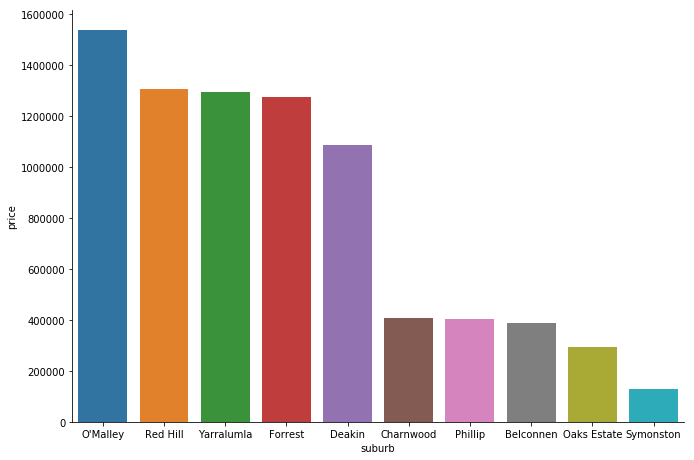

In [107]:
sns.catplot("suburb", "price", data=by_price1, kind="bar", height = 6.5, aspect = 1.5)
plt.savefig('both.png')
plt.show()

### En el gráfico de barras podemos visualizar la diferencia entre las 5 suburbios con los precios más altos y los 5 suburbios con los precios más bajos. 

In [108]:
state10_final.shape

(2187, 11)

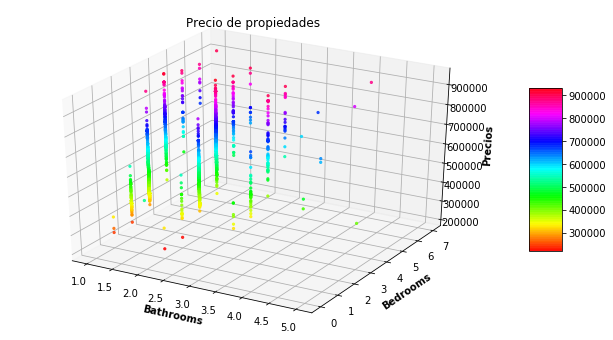

In [109]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = state10_final["bathrooms"]
ydata = state10_final["bedrooms"]
zdata = state10_final["price"]
my_cmap = plt.get_cmap('hsv') 
sctt = ax.scatter3D(xdata, ydata, zdata, alpha = 0.8, c = (xdata + ydata + zdata),  cmap = my_cmap,  marker ='.')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

plt.title("Precio de propiedades") 
ax.set_xlabel('Bathrooms', fontweight ='bold')  
ax.set_ylabel('Bedrooms', fontweight ='bold')  
ax.set_zlabel('Precios', fontweight ='bold') 

plt.show()

# Clusterización

#### Creamos un subconjunto de datos con las columnas que nos interesa.

In [110]:
state_cluster = state[["bathrooms","bedrooms","parking","suburb","price"]]

#### Completaremos los datos faltantes y vemos que el conjunto de datos tiene 41,777 propiedades y 5 columnas.

In [111]:
state_cluster = state_cluster.dropna(axis = 0, how = "any")
state_cluster.shape

(41777, 5)

#### Aquí podemos ver la cabecera del conjunto de datos.

In [112]:
state_cluster.head()

,bathrooms,bedrooms,parking,suburb,price
0,2.0,4,2,Nicholls,223000.0
3,1.0,3,1,Isabella Plains,276000.0
5,2.0,3,2,Theodore,350000.0
10,1.0,3,1,Gordon,270000.0
11,1.0,3,1,Chisholm,272500.0


#### Vamos a aplicar One Hot Encoding a la columna de "suburb".

In [113]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  
state_cluster['suburb']= le.fit_transform(state_cluster['suburb']) 

In [114]:
state_cluster.head()

,bathrooms,bedrooms,parking,suburb,price
0,2.0,4,2,76,223000.0
3,1.0,3,1,57,276000.0
5,2.0,3,2,95,350000.0
10,1.0,3,1,43,270000.0
11,1.0,3,1,17,272500.0


#### Vamos a normalizar los datos. 

In [115]:
state_cluster.describe()

,bathrooms,bedrooms,parking,suburb,price
count,41777.000000,41777.000000,41777.000000,41777.000000,4.177700e+04
mean,1.641334,3.189769,1.758073,49.527060,6.041888e+05
std,0.643735,0.989696,0.938631,30.038118,3.142610e+05
min,1.000000,0.000000,0.000000,0.000000,5.000000e+04
25%,1.000000,3.000000,1.000000,23.000000,4.300000e+05
50%,2.000000,3.000000,2.000000,50.000000,5.390000e+05
75%,2.000000,4.000000,2.000000,74.000000,6.775000e+05
max,21.000000,14.000000,31.000000,106.000000,8.000000e+06


In [116]:
state_cluster_norm = (state_cluster - state_cluster.min())/(state_cluster.max() - state_cluster.min())
state_cluster_norm.describe()

,bathrooms,bedrooms,parking,suburb,price
count,41777.000000,41777.000000,41777.000000,41777.000000,41777.000000
mean,0.032067,0.227841,0.056712,0.467236,0.069709
std,0.032187,0.070693,0.030278,0.283378,0.039530
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.214286,0.032258,0.216981,0.047799
50%,0.050000,0.214286,0.064516,0.471698,0.061509
75%,0.050000,0.285714,0.064516,0.698113,0.078931
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Buscaremos la cantidad óptima de clusters. 

In [117]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(state_cluster_norm)
    wcss.append(kmeans.inertia_)

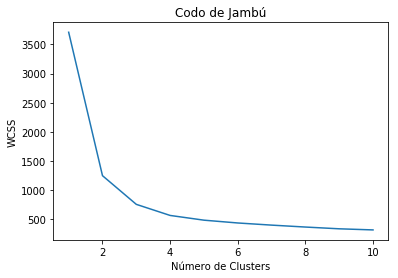

In [118]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

#### Aplicando el método k-means al conjunto de datos 

In [119]:
clustering = KMeans(n_clusters = 4, max_iter = 300)
clustering.fit(state_cluster_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Agreguemos una nueva columna. 

In [120]:
state_cluster["KMeans_Cluster"] = clustering.labels_
state_cluster.head()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
0,2.0,4,2,76,223000.0,3
3,1.0,3,1,57,276000.0,3
5,2.0,3,2,95,350000.0,0
10,1.0,3,1,43,270000.0,2
11,1.0,3,1,17,272500.0,1


#### Visualizando los clusters.

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_state_cluster = pca.fit_transform(state_cluster_norm)
pca_state_cluster_df = pd.DataFrame(data = pca_state_cluster, columns = ["comp1","comp2"])
state_comp = pd.concat([pca_state_cluster_df, state_cluster[["KMeans_Cluster"]]], axis=1)

state_comp.head()

,comp1,comp2,KMeans_Cluster
0,0.249742,0.041102,3.0
1,0.070283,-0.036359,NaN
2,0.428645,-0.020272,NaN
3,-0.061791,-0.035720,3.0
4,-0.307063,-0.033998,NaN


In [122]:
state_comp = state_comp.dropna(axis = 0, how = "any")

In [123]:
print(pd.isnull(state_comp["comp1"]).values.ravel().sum())
print(pd.isnull(state_comp["comp2"]).values.ravel().sum())
print(pd.isnull(state_comp["KMeans_Cluster"]).values.ravel().sum())

0
0
0


In [124]:
state_comp.head()

,comp1,comp2,KMeans_Cluster
0,0.249742,0.041102,3.0
3,-0.061791,-0.035720,3.0
5,-0.061784,-0.035308,0.0
10,0.070264,-0.037380,2.0
11,-0.061791,-0.035720,1.0


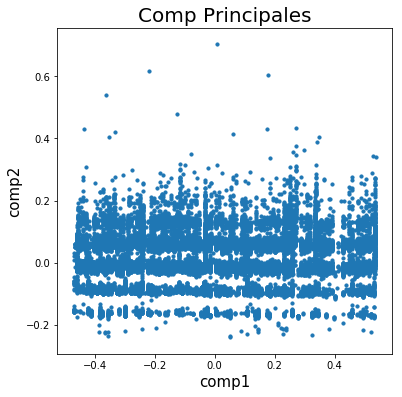

In [125]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("comp1", fontsize = 15)
ax.set_ylabel("comp2", fontsize = 15)
ax.set_title("Comp Principales", fontsize = 20)

color_theme = np.array(["blue", "green", "orange", "black"])
ax.scatter(x = state_comp["comp1"], y = state_comp["comp2"], s=10)

plt.show()

#### Analicemos cada cluster 

In [126]:
state_cluster.head()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
0,2.0,4,2,76,223000.0,3
3,1.0,3,1,57,276000.0,3
5,2.0,3,2,95,350000.0,0
10,1.0,3,1,43,270000.0,2
11,1.0,3,1,17,272500.0,1


In [127]:
cluster0 = state_cluster[state_cluster["KMeans_Cluster"] == 0]
print(cluster0.shape)
cluster1 = state_cluster[state_cluster["KMeans_Cluster"] == 1]
print(cluster1.shape)
cluster2 = state_cluster[state_cluster["KMeans_Cluster"] == 2]
print(cluster2.shape)
cluster3 = state_cluster[state_cluster["KMeans_Cluster"] == 3]
print(cluster3.shape)

(7679, 6)
(11106, 6)
(10879, 6)
(12113, 6)


In [128]:
cluster0.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,7679.000000,7679.000000,7679.000000,7679.000000,7.679000e+03,7679.0
mean,1.601641,3.156140,1.760125,93.484829,6.242857e+05,0.0
std,0.649044,0.988195,1.043352,8.329062,3.781502e+05,0.0
min,1.000000,0.000000,0.000000,80.000000,5.000000e+04,0.0
25%,1.000000,3.000000,1.000000,85.000000,4.304750e+05,0.0
50%,2.000000,3.000000,2.000000,95.000000,5.375000e+05,0.0
75%,2.000000,4.000000,2.000000,101.000000,6.800000e+05,0.0
max,5.000000,9.000000,31.000000,106.000000,8.000000e+06,0.0


In [129]:
cluster1.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,11106.000000,11106.000000,11106.000000,11106.000000,1.110600e+04,11106.0
mean,1.643796,3.052134,1.720241,11.529714,5.934644e+05,1.0
std,0.625358,1.047749,0.868675,6.683470,2.924135e+05,0.0
min,1.000000,0.000000,0.000000,0.000000,5.000000e+04,1.0
25%,1.000000,2.000000,1.000000,6.000000,4.150000e+05,1.0
50%,2.000000,3.000000,2.000000,11.000000,5.200000e+05,1.0
75%,2.000000,4.000000,2.000000,17.000000,6.800000e+05,1.0
max,9.000000,9.000000,18.000000,26.000000,4.000000e+06,1.0


In [130]:
cluster2.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,10879.000000,10879.000000,10879.000000,10879.000000,1.087900e+04,10879.0
mean,1.714680,3.363636,1.836106,39.021693,6.161900e+05,2.0
std,0.665266,0.956272,0.948517,7.677368,3.187905e+05,0.0
min,1.000000,0.000000,0.000000,24.000000,5.000000e+04,2.0
25%,1.000000,3.000000,1.000000,32.000000,4.500000e+05,2.0
50%,2.000000,3.000000,2.000000,40.000000,5.500000e+05,2.0
75%,2.000000,4.000000,2.000000,46.000000,6.850000e+05,2.0
max,21.000000,14.000000,21.000000,53.000000,6.480000e+06,2.0


In [131]:
cluster3.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,12113.000000,12113.000000,12113.000000,12113.000000,1.211300e+04,12113.0
mean,1.598365,3.181128,1.721374,65.933790,5.905026e+05,3.0
std,0.631296,0.941424,0.916900,7.548133,2.822062e+05,0.0
min,1.000000,0.000000,0.000000,52.000000,5.000000e+04,3.0
25%,1.000000,3.000000,1.000000,60.000000,4.285000e+05,3.0
50%,2.000000,3.000000,2.000000,66.000000,5.250000e+05,3.0
75%,2.000000,4.000000,2.000000,74.000000,6.750000e+05,3.0
max,8.000000,11.000000,11.000000,79.000000,4.150000e+06,3.0


# Analicemos por fecha 

In [132]:
state_fecha = state.dropna(axis = 0, how = "any")
state_fecha.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
37,1/12/2006,350000.0,Gordon,2906,-35.463834,149.085331,1,2.0,3,house,ACT616
42,21/01/2007,450000.0,Conder,2906,-35.465751,149.111360,2,2.0,3,house,ACT613
44,16/02/2007,250000.0,Isabella Plains,2905,-35.425169,149.099422,1,1.0,3,house,ACT612
45,22/02/2007,350000.0,Gordon,2906,-35.464457,149.084241,1,2.0,3,house,ACT616
46,27/02/2007,290000.0,Conder,2906,-35.462270,149.109476,1,1.0,3,house,ACT613


In [133]:
state_fecha_max = state[(state["suburb"] == "O'Malley") | (state["suburb"] == "Red Hill") | (state["suburb"] == "Yarralumla")
                       | (state["suburb"] == "Forrest") | (state["suburb"] == "Deakin")] 
state_fecha_min = state[(state["suburb"] == "Charnwood")
                       | (state["suburb"] == "Phillip") | (state["suburb"] == "Belconnen") | (state["suburb"] == "Oaks Estate")
                       | (state["suburb"] == "Symonston")]

C:\Users\lalemus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


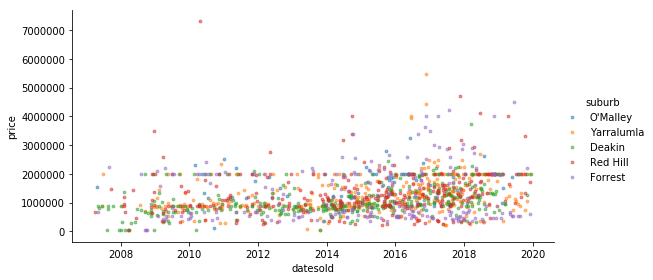

In [134]:
state_fecha_max['datesold'] = pd.to_datetime(state_fecha_max['datesold'])
%matplotlib inline 
fg = sns.FacetGrid(data=state_fecha_max, hue='suburb', aspect=2, height=4)
fg.map(plt.scatter, 'datesold', 'price', alpha=0.5, s=8).add_legend()
plt.savefig('tshead.png')
plt.show()

C:\Users\lalemus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


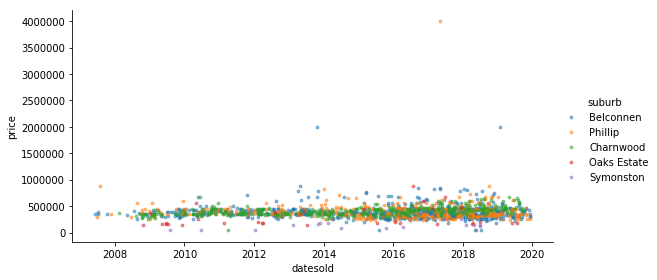

In [135]:
state_fecha_min['datesold'] = pd.to_datetime(state_fecha_min['datesold'])
%matplotlib inline 
fg = sns.FacetGrid(data=state_fecha_min, hue='suburb', aspect=2, height=4)
fg.map(plt.scatter, 'datesold', 'price', alpha=0.5, s=8).add_legend()
plt.savefig('tstail.png')
plt.show()

# Analicemos el cluster 0

In [136]:
cluster0.shape

(7679, 6)

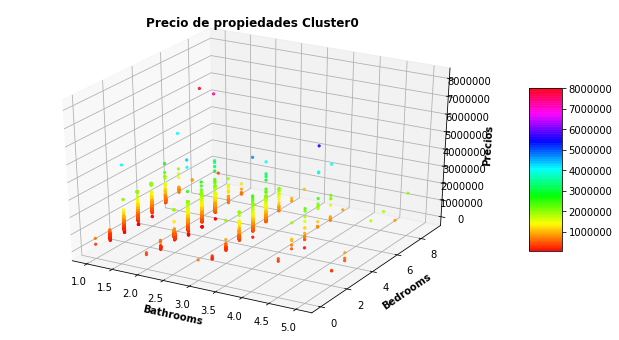

In [137]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xcl0 = cluster0["bathrooms"]
ycl0 = cluster0["bedrooms"]
zcl0 = cluster0["price"]
my_cmap = plt.get_cmap('hsv') 
sctt = ax.scatter3D(xcl0, ycl0, zcl0, alpha = 0.8, c = (xcl0 + ycl0 + zcl0),  cmap = my_cmap,  marker ='.')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

plt.title("Precio de propiedades Cluster0", fontweight = "bold") 
ax.set_xlabel('Bathrooms', fontweight ='bold')  
ax.set_ylabel('Bedrooms', fontweight ='bold')  
ax.set_zlabel('Precios', fontweight ='bold') 

plt.show()

In [138]:
cluster0.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,7679.000000,7679.000000,7679.000000,7679.000000,7.679000e+03,7679.0
mean,1.601641,3.156140,1.760125,93.484829,6.242857e+05,0.0
std,0.649044,0.988195,1.043352,8.329062,3.781502e+05,0.0
min,1.000000,0.000000,0.000000,80.000000,5.000000e+04,0.0
25%,1.000000,3.000000,1.000000,85.000000,4.304750e+05,0.0
50%,2.000000,3.000000,2.000000,95.000000,5.375000e+05,0.0
75%,2.000000,4.000000,2.000000,101.000000,6.800000e+05,0.0
max,5.000000,9.000000,31.000000,106.000000,8.000000e+06,0.0


# Analicemos el cluster 1 

In [139]:
cluster1.shape

(11106, 6)

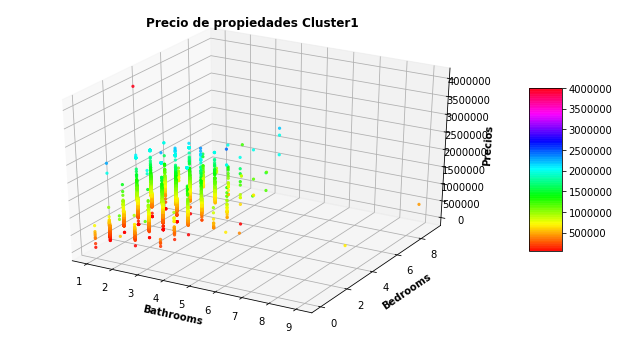

In [140]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xcl1 = cluster1["bathrooms"]
ycl1 = cluster1["bedrooms"]
zcl1 = cluster1["price"]
my_cmap = plt.get_cmap('hsv') 
sctt = ax.scatter3D(xcl1, ycl1, zcl1, alpha = 0.8, c = (xcl1 + ycl1 + zcl1),  cmap = my_cmap,  marker ='.')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

plt.title("Precio de propiedades Cluster1", fontweight = "bold") 
ax.set_xlabel('Bathrooms', fontweight ='bold')  
ax.set_ylabel('Bedrooms', fontweight ='bold')  
ax.set_zlabel('Precios', fontweight ='bold') 

plt.show()

In [141]:
cluster1.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,11106.000000,11106.000000,11106.000000,11106.000000,1.110600e+04,11106.0
mean,1.643796,3.052134,1.720241,11.529714,5.934644e+05,1.0
std,0.625358,1.047749,0.868675,6.683470,2.924135e+05,0.0
min,1.000000,0.000000,0.000000,0.000000,5.000000e+04,1.0
25%,1.000000,2.000000,1.000000,6.000000,4.150000e+05,1.0
50%,2.000000,3.000000,2.000000,11.000000,5.200000e+05,1.0
75%,2.000000,4.000000,2.000000,17.000000,6.800000e+05,1.0
max,9.000000,9.000000,18.000000,26.000000,4.000000e+06,1.0


# Analicemos el cluster 2

In [142]:
cluster2.shape

(10879, 6)

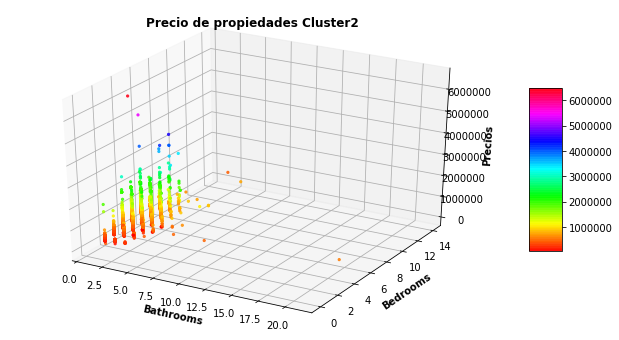

In [143]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xcl2 = cluster2["bathrooms"]
ycl2 = cluster2["bedrooms"]
zcl2 = cluster2["price"]
my_cmap = plt.get_cmap('hsv') 
sctt = ax.scatter3D(xcl2, ycl2, zcl2, alpha = 0.8, c = (xcl2 + ycl2 + zcl2),  cmap = my_cmap,  marker ='.')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

plt.title("Precio de propiedades Cluster2", fontweight = "bold") 
ax.set_xlabel('Bathrooms', fontweight ='bold')  
ax.set_ylabel('Bedrooms', fontweight ='bold')  
ax.set_zlabel('Precios', fontweight ='bold') 

plt.show()

In [144]:
cluster2.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,10879.000000,10879.000000,10879.000000,10879.000000,1.087900e+04,10879.0
mean,1.714680,3.363636,1.836106,39.021693,6.161900e+05,2.0
std,0.665266,0.956272,0.948517,7.677368,3.187905e+05,0.0
min,1.000000,0.000000,0.000000,24.000000,5.000000e+04,2.0
25%,1.000000,3.000000,1.000000,32.000000,4.500000e+05,2.0
50%,2.000000,3.000000,2.000000,40.000000,5.500000e+05,2.0
75%,2.000000,4.000000,2.000000,46.000000,6.850000e+05,2.0
max,21.000000,14.000000,21.000000,53.000000,6.480000e+06,2.0


# Analicemos el cluster 3

In [145]:
cluster3.shape

(12113, 6)

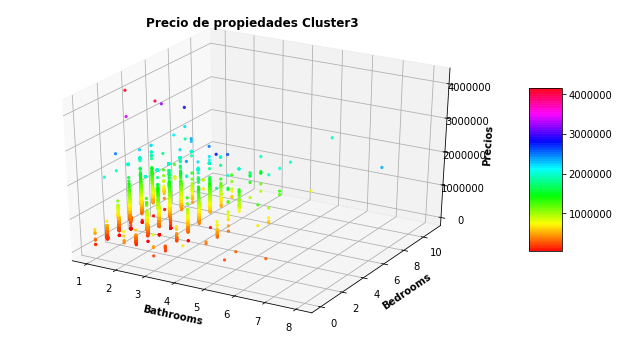

In [146]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (11, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xcl3 = cluster3["bathrooms"]
ycl3 = cluster3["bedrooms"]
zcl3 = cluster3["price"]
my_cmap = plt.get_cmap('hsv') 
sctt = ax.scatter3D(xcl3, ycl3, zcl3, alpha = 0.8, c = (xcl3 + ycl3 + zcl3),  cmap = my_cmap,  marker ='.')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

plt.title("Precio de propiedades Cluster3", fontweight = "bold") 
ax.set_xlabel('Bathrooms', fontweight ='bold')  
ax.set_ylabel('Bedrooms', fontweight ='bold')  
ax.set_zlabel('Precios', fontweight ='bold') 

plt.show()

In [147]:
cluster3.describe()

,bathrooms,bedrooms,parking,suburb,price,KMeans_Cluster
count,12113.000000,12113.000000,12113.000000,12113.000000,1.211300e+04,12113.0
mean,1.598365,3.181128,1.721374,65.933790,5.905026e+05,3.0
std,0.631296,0.941424,0.916900,7.548133,2.822062e+05,0.0
min,1.000000,0.000000,0.000000,52.000000,5.000000e+04,3.0
25%,1.000000,3.000000,1.000000,60.000000,4.285000e+05,3.0
50%,2.000000,3.000000,2.000000,66.000000,5.250000e+05,3.0
75%,2.000000,4.000000,2.000000,74.000000,6.750000e+05,3.0
max,8.000000,11.000000,11.000000,79.000000,4.150000e+06,3.0


# Redes Neuronales

#### Se aplicará redes neuronales al suburbio de Calwell para predecir el precio de sus propiedades en base a la cantidad de habitaciones, dormitorios y baños. 

In [148]:
from sklearn.neural_network import MLPRegressor

In [149]:
statenn = state[state["suburb"] == "Calwell"]
statenn.shape

(716, 11)

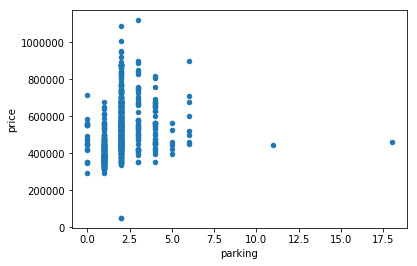

In [150]:
statenn.plot(kind = "scatter", x = "parking", y = "price")

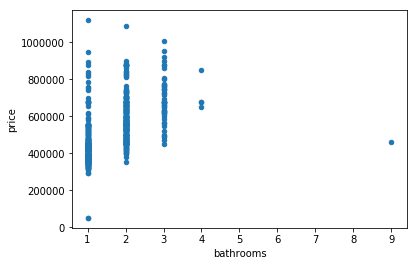

In [151]:
statenn.plot(kind = "scatter", x = "bathrooms", y = "price")

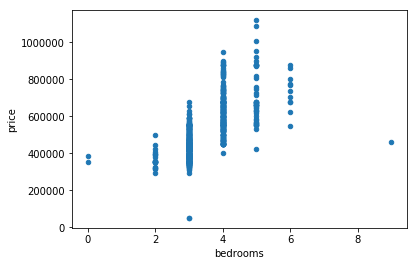

In [152]:
statenn.plot(kind = "scatter", x = "bedrooms", y = "price")

In [153]:
statenn = statenn.fillna(method='ffill')

In [154]:
statenn.head()

,datesold,price,suburb,postcode,lat,lon,parking,bathrooms,bedrooms,propertyType,suburbid
50,4/04/2007,465000.0,Calwell,2905,NaN,NaN,2,2.0,4,house,ACT611
56,31/05/2007,675000.0,Calwell,2905,NaN,NaN,2,3.0,5,house,ACT611
133,21/08/2007,455000.0,Calwell,2905,NaN,NaN,2,2.0,4,house,ACT611
145,30/08/2007,315000.0,Calwell,2905,NaN,NaN,1,1.0,2,house,ACT611
298,1/02/2008,599000.0,Calwell,2905,NaN,NaN,2,2.0,4,house,ACT611


In [155]:
Xnn = statenn.iloc[:,6:9]
Ynn = statenn.iloc[:,1]

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnn, Ynn)

In [157]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 3) (179, 3) (537,) (179,)
